## CASE STUDY ON MEASURES OF CENTRAL TENDENCY AND DISPERSION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("C:/Users/hp/Downloads/StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Inference: The data does not contain any null values.

In [5]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

#### Question 1
####  Find out how many males and females participated in the test.

In [7]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

#### The number of females participated in the test is 512.
#### The number of males participated in the test is 482.

#### Question 2
#### What do you think about the students' parental level of education?



C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


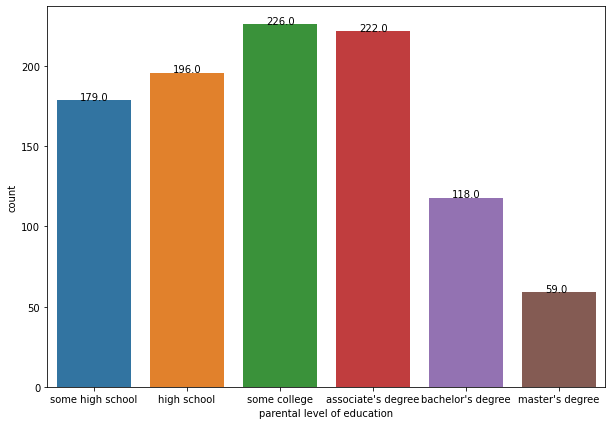

In [8]:
plt.figure(figsize=(10,7))
plot1=sns.countplot(data['parental level of education'])
for i in plot1.patches:
    plot1.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.25,i.get_height()+0.1))

### 3. Who scores the most on average for math, reading and writing based on
###     a) Gender

In [9]:
data_new=data[['gender','math score', 'reading score','writing score','test preparation course']]
data_new     

,gender,math score,reading score,writing score,test preparation course
0,female,0,17,10,none
1,female,8,24,23,none
2,female,18,32,28,none
3,female,11,38,32,none
4,female,22,39,33,none
...,...,...,...,...,...
995,male,99,87,81,completed
996,male,100,96,86,completed
997,male,100,97,99,completed
998,male,100,100,93,completed


In [10]:
data_new['avg']=data_new[['math score', 'reading score','writing score']].mean(axis=1)
data_new

<ipython-input-10-0baad0718090>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['avg']=data_new[['math score', 'reading score','writing score']].mean(axis=1)


,gender,math score,reading score,writing score,test preparation course,avg
0,female,0,17,10,none,9.000000
1,female,8,24,23,none,18.333333
2,female,18,32,28,none,26.000000
3,female,11,38,32,none,27.000000
4,female,22,39,33,none,31.333333
...,...,...,...,...,...,...
995,male,99,87,81,completed,89.000000
996,male,100,96,86,completed,94.000000
997,male,100,97,99,completed,98.666667
998,male,100,100,93,completed,97.666667


In [11]:
AVG=data_new.groupby('avg')['gender'].value_counts().tail(2)
AVG

avg    gender
100.0  female    2
       male      1
Name: gender, dtype: int64

Text(0, 0.5, 'no of students')

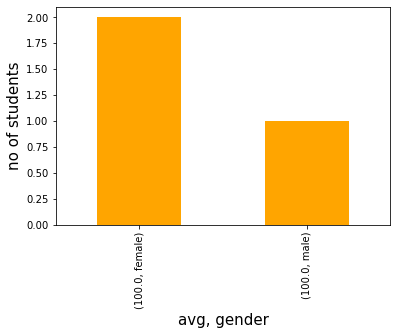

In [12]:
AVG.plot(kind='bar',color='orange')
plt.xlabel('avg, gender',fontsize=15)
plt.ylabel('no of students',fontsize=15)

### Inference: Of all the students there are 2 females and 1 male who scores 100 as average of math score,reading and writing score.

### b)Test preparation course

In [13]:
TEST_PREP=data_new.groupby('test preparation course')['math score', 'reading score','writing score'].mean()
TEST_PREP

<ipython-input-13-a0212d3a9854>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TEST_PREP=data_new.groupby('test preparation course')['math score', 'reading score','writing score'].mean()


,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


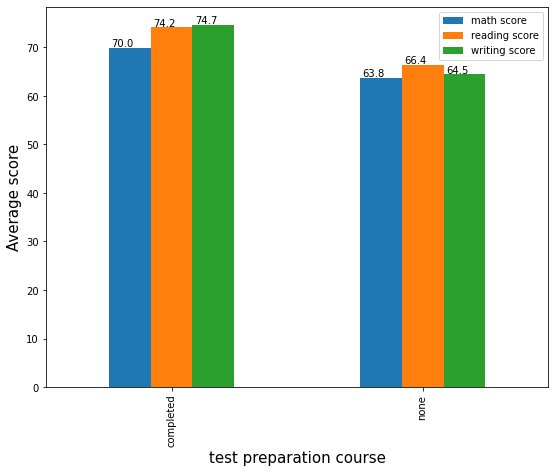

In [14]:
TEST_PREP_PLOT=TEST_PREP.plot(kind='bar',figsize=(9,7))
for i in TEST_PREP_PLOT.patches:
    TEST_PREP_PLOT.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.01,i.get_height()+0.2))
plt.xlabel('test preparation course',fontsize=15)
plt.ylabel('Average score',fontsize=15)
plt.show()

#### Inference: Those students who have completed the test preparation course have a greater average for math score, reading score and writing score compared to those who haven't taken the test preparation course. 

### 4) What do you think about the scoring variation for math, reading and writing based on 
### a)gender

In [15]:
Score_var=data.groupby('gender')['math score', 'reading score','writing score'].std()
Score_var


<ipython-input-15-ea0bbe30aece>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Score_var=data.groupby('gender')['math score', 'reading score','writing score'].std()


,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


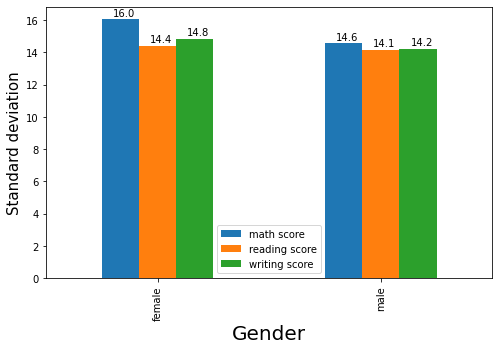

In [16]:
SV_plot=Score_var.plot(kind='bar',figsize=(8,5))
for i in SV_plot.patches:
    SV_plot.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.05,i.get_height()+0.2))    
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Standard deviation',fontsize=15)
plt.show()    

#### Inference: Females have a greater scoring variation than males for math, reading and writing.

### b) Test preparation course

In [17]:
Test_std=data.groupby('test preparation course')['math score', 'reading score','writing score'].std()
Test_std

<ipython-input-17-3b9c0ccb3151>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Test_std=data.groupby('test preparation course')['math score', 'reading score','writing score'].std()


,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


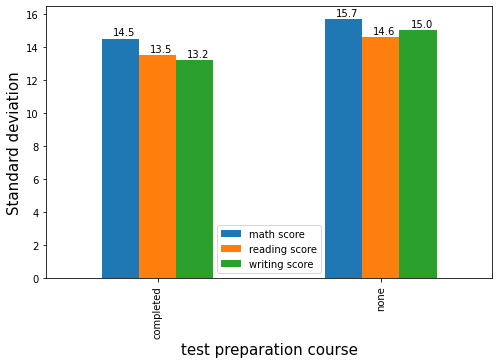

In [18]:
Test_plot=Test_std.plot(kind='bar',figsize=(8,5))
for i in Test_plot.patches:
    Test_plot.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.05,i.get_height()+0.2))    
plt.xlabel('test preparation course',fontsize=15)
plt.ylabel('Standard deviation',fontsize=15)
plt.show()   

#### The scoring variation is high among the students who have not taken the test preparation course. 

### Question 5
### The management needs your help to give bonus points to the top 25% of students based on their maths    score, so how will you help the management to achieve this.



In [19]:
top_25=np.percentile(data_new['math score'],75)
top_25

77.0

#### Inference: Since 77 is the 75th percentile of the math score, all the students whose math score is greater than or above 77  can   be given bonus points.
